In [20]:
# Import necessary modules
import pyfits as pf
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import math
import os

dim = 3624  #dimension de los fits_face

#filters_values
u = 121671348.887
g = 168273491.446
r = 178848396.083
i = 69397708.7252
z = 59157262.0017
u_pri = 126207773.267
g_pri = 149732062.76
r_pri = 188318397.068
i_pri = 67579475.1401
z_pri = 50496673.9991

# agregado 13/06/16, modifico el run_morh, morh.dat y el get_morh para pasarle el zeropt como parametro
#filter_value = r
filter_value = g
#fits_path = '/media/spedrosa/My Passport/Projects/Eagle/Morphology/fits_face' 
fits_path = '/media/spedrosa/My Passport/Projects/Eagle/Morphology/fits_face_g' 
#fits_path = '/media/susana/My Passport/Projects/Eagle/Morphology/fits_face' 
fits = os.listdir(fits_path) 
dim_fit = 256
total_flux = np.zeros(dim)
zeropt = np.zeros(dim)
t=0
for fit in fits:
    full_fit_path = os.path.join(fits_path, fit)
    #print full_fit_path
    # read datacube
    f = pf.open(full_fit_path)
    cube = f[0].data
    header = f[0].header
    f.close()

    image = cube[:, :]
    for i in range(dim_fit):
        for j in range(dim_fit):
            total_flux[t] = total_flux[t] + image[i][j]
    t = t + 1
    
total_flux = total_flux / filter_value
#convierte el flujo a magnitudes:
zeropt = -2.5 * np.log10(total_flux/(3.631e6 * (4.8532896 *4.8532896 )))

#print zeropt
f1 = open('zeropt.dat', 'wt')
for i in range(dim):    
    #out = ",".join([mylist0,mylist1[i],mylist2[i],mylist3[i],'\n'])
    out = str(zeropt[i]) + '\n'
    f1.write(out)

f1.close()    
#_________________________________________

galaxiesID = np.zeros((dim,), dtype=np.int)
sfr = np.zeros((dim,), dtype=np.float)
m_dm = np.zeros((dim,), dtype=np.float)
m_gs = np.zeros((dim,), dtype=np.float)
m_st = np.zeros((dim,), dtype=np.float)
r_hm = np.zeros((dim,), dtype=np.float)
u_mag = np.zeros((dim,), dtype=np.float)
g_mag = np.zeros((dim,), dtype=np.float)
r_mag = np.zeros((dim,), dtype=np.float)
mylist4 = []
i=0
with open('eagle_db_fits_27.dat', 'r') as Gf:
    for line in Gf:
        mylist4.append(line)
Gf.close()

for i in range(dim): 
        list_eag = mylist4[i].split(",")
        galaxiesID[i] = int(list_eag[0])
        sfr[i] = float(list_eag[1])
        m_dm[i] = float(list_eag[2])
        m_gs[i] = float(list_eag[3])
        m_st[i] = float(list_eag[4])
        r_hm[i] = float(list_eag[5])
        u_mag[i] = float(list_eag[10])
        g_mag[i] = float(list_eag[11])
        r_mag[i] = float(list_eag[12])

ord = np.argsort(galaxiesID)
galaxiesID_ord2 = galaxiesID [ord]
sfr_ord = sfr [ord]
m_dm_ord = m_dm [ord]
m_gs_ord = m_gs [ord]
m_st_ord = m_st [ord]
r_hm_ord = r_hm [ord]
u_mag_ord = u_mag [ord]
g_mag_ord = g_mag [ord]
r_mag_ord = r_mag [ord]

f0 = open('galaxies_ID1.dat', 'wt')
f1 = open('eagle_db_fits_27_ord.dat', 'wt')
for i in range(dim):    
    f1.write(str(galaxiesID_ord2[i]) + ',' + str(sfr_ord[i]) + ',' + str(m_dm_ord[i]) + ',' + str(m_gs_ord[i]) + ',' + str(m_st_ord[i]) + ',' + str(r_hm_ord[i]) + ',' + str(u_mag_ord[i]) + ',' + str(g_mag_ord[i]) + ',' + str(r_mag_ord[i]) +'\n')
    out = str(galaxiesID_ord2[i]) + '\n'
    f0.write(out)
f0.close()    
f1.close()

f1 = open('run_gmorph.pro', 'wt')

#fits_path = '/media/susana/My Passport/Projects/Eagle/Morphology/fits_face' 
#cat_path = '/media/susana/My Passport/Projects/Eagle/Morphology/codigo_Lotz/catalogues'
#seg_path = '/media/susana/My Passport/Projects/Eagle/Morphology/codigo_Lotz/segmentation'

#fits_path = '/media/spedrosa/My Passport/Projects/Eagle/Morphology/fits_face' 
#cat_path = '/media/spedrosa/My Passport/Projects/Eagle/Morphology/codigo_Lotz/cat_r_face'
#seg_path = '/media/spedrosa/My Passport/Projects/Eagle/Morphology/codigo_Lotz/seg_r_face'

fits_path = '/media/spedrosa/My Passport/Projects/Eagle/Morphology/fits_face_g' 
cat_path = '/media/spedrosa/My Passport/Projects/Eagle/Morphology/codigo_Lotz/cat_g_face'
seg_path = '/media/spedrosa/My Passport/Projects/Eagle/Morphology/codigo_Lotz/seg_g_face'

fits = os.listdir(fits_path) 
cats = os.listdir(cat_path) 
segs = os.listdir(seg_path)

mylist1 = []
mylist2 = []
mylist3 = []

fit_ID = np.zeros((dim,), dtype=np.int)
i = 0
for fit in fits:
    cut0 = fit.split("_")
    cut_list = cut0[2]
    cut2 = cut_list.split(".")
    fit_ID[i] = int(cut2[0])
    i = i + 1

ord = np.argsort(fit_ID)
fit_ID_ord = fit_ID[ord]
f0 = open('galaxies_ID2.dat', 'wt')
for i in range(dim):    
    str1 = 'new_galface_' + str(fit_ID_ord[i]) + '.fits'
    mylist1.append(str1)
    out = str(fit_ID_ord[i]) + '\n'
    f0.write(out)
f0.close()    

cat_ID = np.zeros((dim,), dtype=np.int)
i = 0
for cat in cats:
    cut0 = cat.split("_")
    cut_list = cut0[2]
    cut2 = cut_list.split(".")
    cat_ID[i] = int(cut2[0])
    i = i + 1

ord = np.argsort(cat_ID)
cat_ID_ord = cat_ID[ord]
f0 = open('galaxies_ID3.dat', 'wt')
for i in range(dim):    
    str1 = 'new_galface_' + str(cat_ID_ord[i]) + '.cat'
    mylist2.append(str1)
    out = str(cat_ID_ord[i]) + '\n'
    f0.write(out)
f0.close() 


seg_ID = np.zeros((dim,), dtype=np.int)
i = 0
for seg in segs:
    cut0 = seg.split("_")
    cut_list = cut0[2]
    cut2 = cut_list.split(".")
    seg_ID[i] = int(cut2[0])
    i = i + 1

ord = np.argsort(seg_ID)
seg_ID_ord = seg_ID[ord]
f0 = open('galaxies_ID4.dat', 'wt')
for i in range(dim):    
    str1 = 'new_galface_' + str(seg_ID_ord[i]) + '.seg.fits'
    mylist3.append(str1)
    out = str(seg_ID_ord[i]) + '\n'
    f0.write(out)
f0.close() 


mylist0 = 'get_gmorph_new,0'
for i in range(dim):    
    #out = ",".join([mylist0,mylist1[i],mylist2[i],mylist3[i],'\n'])
    out = mylist0 + ",\'" + '/home/spedrosa/Projects/Eagle/codigo_Lotz/cat_g_face/' + mylist2[i] + "\',\'" + '/home/spedrosa/Projects/Eagle/fits_face/' + mylist1[i] + "\',\'" + "wht1.fits" + "\',\'" + '/home/spedrosa/Projects/Eagle/codigo_Lotz/seg_g_face/' + mylist3[i] + "\',\'" + "out_face_g.morph\'" + "," + str(zeropt[i]) +'\n'
    f1.write(out)

f1.write("exit")
f1.close()    

    #get_gmorph_new, 0, 'xxx.cat', 'xxx.fits', 'wht1.fits', 'xxx.fits', 'out_xxx.morph'


[ 0.51495  0.59088  0.51839 ...,  0.57947  0.47759  0.52223]
max min masas
stars: 11.905933565 10.0017995527
gas: 13.3757964914 -inf
Rhm: <built-in function max>


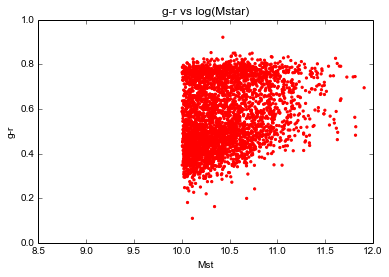

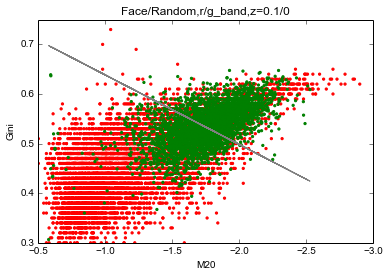

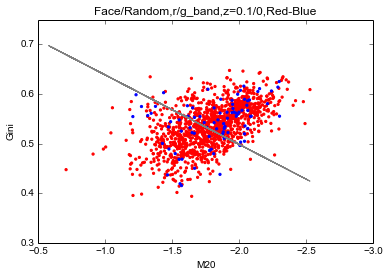

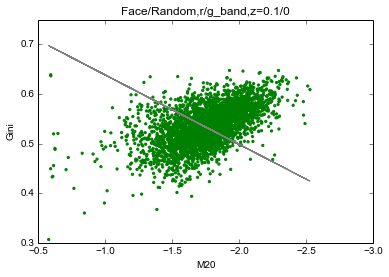

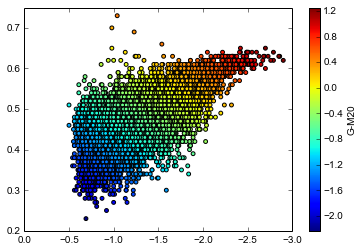

In [33]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import ascii 
import csv
import sys
import h5py


dim = 3624  #dimension de los fits_face
dim = 3539
galaxiesID = np.zeros((dim,), dtype=np.int)
sfr = np.zeros((dim,), dtype=np.float)
m_dm = np.zeros((dim,), dtype=np.float)
m_gs = np.zeros((dim,), dtype=np.float)
m_st = np.zeros((dim,), dtype=np.float)
r_hm = np.zeros((dim,), dtype=np.float)
u_mag = np.zeros((dim,), dtype=np.float)
g_mag = np.zeros((dim,), dtype=np.float)
r_mag = np.zeros((dim,), dtype=np.float)
color_gr = np.zeros((dim,), dtype=np.float)
color_UB = np.zeros((dim,), dtype=np.float)



mylist4 = []
i=0
with open('eagle_db_fits_27_ord_cut.dat', 'r') as Gf:
    for line in Gf:
        mylist4.append(line)
Gf.close()

for i in range(dim): 
        list_eag = mylist4[i].split(",")
        galaxiesID[i] = int(list_eag[0])
        sfr[i] = float(list_eag[1])
        m_dm[i] = float(list_eag[2])
        m_gs[i] = float(list_eag[3])
        m_st[i] = float(list_eag[4])
        r_hm[i] = float(list_eag[5])
        u_mag[i] = float(list_eag[6])
        g_mag[i] = float(list_eag[7])
        r_mag[i] = float(list_eag[8])
        color_gr[i] = g_mag[i] - r_mag[i]
        color_UB[i] = 0.78*(u_mag[i] - g_mag[i]) - 0.88
        #transformo de magnitudes del SDSS a U-B: U-B=0.78*(u-g) - 0.88 

#print 'max'
#print max(color_UB)
#print 'min'
#print min(color_UB)
#print color_UB        
        
#basePath = '/media/spedrosa/My Passport/Projects/Eagle/Morphology/codigo_Lotz/'
#basePath = '/home/spedrosa/Projects/Eagle/codigo_Lotz/gm20/'
# Eagle  CHEQUEAR el numero correcto de galaxias (antes tenia 3460) ahora 3624
gini_eag = np.zeros(dim)
m20_eag = np.zeros(dim)
asi_eag = np.zeros(dim)
s_eag = np.zeros(dim)
i=0
with open('out_face_r_0702.morph', 'r') as Gf:
#with open('out_face_r.morph', 'r') as Gf:    
    for line in Gf:
        list_eag = line.split()
        gini_eag[i] = list_eag[19]
        m20_eag[i] = list_eag[20]
        i = i +1
Gf.close()

print gini_eag

F = 5 * (-0.7783 - 0.14 * m20_eag + gini_eag)/1.00975

# Illustris
# cam0:10654 cam1:10618 cam2:10639 cam3:10620
gini_ill = np.zeros(10654)
m20_ill = np.zeros(10654)
f = h5py.File('nonparametric_morphologies.hdf5','r') # Lee el archivo
gini_ill = f['Snapshot_135']['gSDSS']['Gini_cam0'][:] 
m20_ill = f['Snapshot_135']['gSDSS']['M20_cam0'][:] 
re_ill = f['Snapshot_135']['gSDSS']['RE_cam0'][:] 
rp_ill = f['Snapshot_135']['gSDSS']['RP_cam0'][:] 

# Observations
#gini_obs1 = np.zeros(160)
#m20_obs1 = np.zeros(160)
#i=0
#with open('Gini_M20_obs1.dat', 'r') as Gf1:
#    for line in Gf1:
#        mylist = line.split(",")
#        gini_obs1[i] = float(mylist[0])
#        m20_obs1[i] = float(mylist[1])
#        i = i + 1

print 'max min masas'
print 'stars:',max(np.log10(m_st)),min(np.log10(m_st))
print 'gas:',max(np.log10(m_gs)),min(np.log10(m_gs))
print 'Rhm:',max

#g-r vs Mst
plt.scatter(np.log10(m_st),g_mag-r_mag,marker ='.', color='red')    
plt.title('g-r vs log(Mstar)')
plt.xlabel('Mst') 
plt.ylabel('g-r') 
plt.xlim(8.5,12)
plt.ylim(0,1)
#plt.loglog()
plt.show() 

#Gini vs M20
plt.scatter(m20_ill,gini_ill, marker ='.', color='red')    
plt.scatter(m20_eag,gini_eag, marker ='.', color='green')
#plt.scatter(m20_obs1,gini_obs1, marker ='.', color='red') 
#plt.plot(m20_obs1,0.7783 + 0.14 * m20_obs1, '-', color='black')
plt.plot(m20_eag,0.7783 + 0.14 * m20_eag, '-', color='grey')
#d = 5* abs(-0.14*m20_obs1 + gini_obs1 - 0.778)/1.009
plt.title('Face/Random,r/g_band,z=0.1/0')
plt.xlabel('M20') 
plt.ylabel('Gini') 
plt.xlim(-0.5, -3)
plt.ylim(0.3, 0.75)
#plt.loglog()
plt.show() 

#Gini vs M20
#index0 = np.where(color_UB > 1.0) 
index0 = np.where((r_hm<15.0) & (np.log10(m_st)>10.5)) 
plt.scatter(m20_eag[index0],gini_eag[index0], marker ='.', color='red')
#index = np.where(color_UB < 1.0) 
index = np.where((r_hm>15.0) & (np.log10(m_st)> 10.5)) 
plt.scatter(m20_eag[index],gini_eag[index], marker ='.', color='blue')
plt.plot(m20_eag,0.7783 + 0.14 * m20_eag, '-', color='grey')
plt.title('Face/Random,r/g_band,z=0.1/0,Red-Blue')
plt.xlabel('M20') 
plt.ylabel('Gini') 
plt.xlim(-0.5, -3)
plt.ylim(0.3, 0.75)
#plt.loglog()
plt.show() 

plt.scatter(m20_eag,gini_eag, marker ='.', color='green')
#plt.scatter(m20_obs1,gini_obs1, marker ='.', color='red') 
#plt.plot(m20_obs1,0.7783 + 0.14 * m20_obs1, '-', color='black')
plt.plot(m20_eag,0.7783 + 0.14 * m20_eag, '-', color='grey')
#d = 5* abs(-0.14*m20_obs1 + gini_obs1 - 0.778)/1.009
plt.title('Face/Random,r/g_band,z=0.1/0')
plt.xlabel('M20') 
plt.ylabel('Gini') 
plt.xlim(-0.5, -3)
plt.ylim(0.3, 0.75)
#plt.loglog()
plt.show() 

#Scatter plot coloreado por propiedad
F_abs = np.abs(-0.693*m20_eag+4.95*gini_eag-3.85)
ind_bul = np.where(gini_eag >= (0.14*m20_eag+0.778))
ind_dis = np.where(gini_eag < (0.14*m20_eag+0.778))
F_abs[ind_bul]= F_abs[ind_bul]
F_abs[ind_dis]= -F_abs[ind_dis]
x = m20_eag
y = gini_eag
cm = plt.cm.jet
#sc = plt.scatter(x, y, c=F_abs, s=15, cmap=cm)#, vmin=0., vmax=5.)
#plt.colorbar(sc, label="G-M20")
#plt.xlim(-0.5, -3)
#plt.ylim(0.3, 0.75)
#figure1 = plt.gcf() #acá te quedarias con la referencia a la figura.
#plt.show
#figure1.savefig("gini_m20_F_eagle.pdf", bbox_inches='tight')  #guardas.

#Illustris con RE/RP
F_abs = np.abs(-0.693*m20_ill+4.95*gini_ill-3.85)
ind_bul = np.where(gini_ill >= (0.14*m20_ill+0.778))
ind_dis = np.where(gini_ill < (0.14*m20_ill+0.778))
F_abs[ind_bul]= F_abs[ind_bul]
F_abs[ind_dis]= -F_abs[ind_dis]
x = m20_ill
y = gini_ill
cm = plt.cm.get_cmap('RdYlBu')
cm = plt.cm.jet
sc = plt.scatter(x, y, c=F_abs, s=15)#, cmap=cm, vmin=5., vmax=25.)
plt.colorbar(sc, label="G-M20")
plt.xlim(-0., -3)
plt.ylim(0.2, 0.75)
figure2 = plt.gcf() #acá te quedarias con la referencia a la figura.
plt.show
figure2.savefig("gini_m20_F_ill.pdf", bbox_inches='tight')  #guardas.



#bounds = np.array([-1.0, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
#cm = plt.cm.get_cmap('RdYlBu')
#u = np.where(rsat_aux/Rvir_z0h <= 1.5)
#sc = plt.scatter(rsat_aux[u]/Rvir_z0h, np.log10(Msatell[u]/Mprinc), c=Coseno[u], s=35, cmap=cm, vmin=-1., vmax=1.)
#plt.colorbar(sc, label="cos (J$_{sat}$ . J$_{p}$)", boundaries=bounds)#, orientation="horizontal")

In [ ]:
# Import necessary modules
import pyfits as pf
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import math
import os

f1 = open('run_gmorph2.pro', 'wt')

fits_path = '/home/spedrosa/Projects/Eagle/fits_face' 
cat_path = '/home/spedrosa/Projects/Eagle/codigo_Lotz/catalogues'
seg_path = '/home/spedrosa/Projects/Eagle/codigo_Lotz/segmentation'
fits = os.listdir(fits_path) 
cats = os.listdir(cat_path) 
segs = os.listdir(seg_path)

dim1 = len(fits)
dim2 = len(cats)
dim3 = len(segs)
print dim1,dim2,dim3

mylist1 = []
mylist2 = []
mylist3 = []

for fit in fits:
    mylist1.append(fit)
mylist1.sort()

for cat in cats:
    mylist2.append(cat)
mylist2.sort()

for seg in segs:
    mylist3.append(seg)
mylist3.sort()
    
mylist0 = 'get_gmorph_new,0'
for i in range(dim1-1):    
    #out = ",".join([mylist0,mylist1[i],mylist2[i],mylist3[i],'\n'])
    out = mylist0 + ",\'" + '/home/spedrosa/Projects/Eagle/codigo_Lotz/catalogues/' + mylist2[i] + "\',\'" + '/home/spedrosa/Projects/Eagle/fits_face/' + mylist1[i] + "\',\'" + "wht1.fits" + "\',\'" + '/home/spedrosa/Projects/Eagle/codigo_Lotz/segmentation/' + mylist3[i] + "\',\'" + "out_test1.morph\'" + '\n'
    f1.write(out)

f1.write("exit")
f1.close()    

    #get_gmorph_new, 0, 'xxx.cat', 'xxx.fits', 'wht1.fits', 'xxx.fits', 'out_xxx.morph'

In [8]:
from astropy.io import fits
import numpy as np
# Primero creo un HDU object
hdu = fits.PrimaryHDU()

# Lo lleno con random
#hdu.data = np.random.random((256,256))
# Lo lleno con 1
hdu.data = np.ones((256, 256))

# Obtiene la cabecera primaria
#cabecera = hdu[0].header

hdu.writeto('wht1.fits', clobber=True)

#image = fits.getdata("niriH.fits")
image = fits.getdata('/home/spedrosa/Projects/Eagle/fits_illus/broadband_132699.fits')
#print image.shape

#full_fit_path = os.path.join(fits_path, fit)
    #print full_fit_path
    # read datacube
f = pf.open(image)
cube = f[15].data
header = f[15].header
f.close()

#I_mean = np.mean(image)

#print I_mean

#print(listsum(image))

#for i in image.shape

plt.imshow(image, cmap='gray')
#plt.show(image_data)
plt.colorbar()

ValueError: data-type with unspecified variable length